# Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Loading Data

In [28]:
disputes = pd.read_csv("/content/disputes.csv")
txns = pd.read_csv("/content/transactions.csv")

In [29]:
display(disputes.head())
display(txns.head())

,dispute_id,customer_id,txn_id,description,txn_type,channel,amount,created_at
0,D001,C001,T001,I got charged twice for the same UPI payment,UPI,Mobile,999,01-08-2025 10:23
1,D002,C002,T002,My NEFT failed but money is not refunded,NEFT,Web,1250,01-08-2025 11:55
2,D003,C003,T003,Transaction shows failed but money was debited,CARD,POS,500,01-08-2025 12:10
3,D004,C004,T004,I did not make this payment. This is fraud.,CARD,Mobile,1200,01-08-2025 13:30
4,D005,C005,T005,Still waiting for refund after canceled transaction,CARD,Web,750,01-08-2025 14:02


,txn_id,customer_id,amount,status,timestamp,channel,merchant
0,T001,C001,999,SUCCESS,01-08-2025 10:22,Mobile,UPI@StoreA
1,T001_DUP1,C001,999,SUCCESS,01-08-2025 10:23,Mobile,UPI@StoreA
2,T002,C002,1250,FAILED,01-08-2025 11:54,Web,NEFT@BankX
3,T003,C003,500,FAILED,01-08-2025 12:10,POS,CARD@ShopB
4,T004,C004,1200,SUCCESS,01-08-2025 13:29,Mobile,CARD@AppC


In [30]:
print(disputes.info())
print(txns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dispute_id   20 non-null     object
 1   customer_id  20 non-null     object
 2   txn_id       20 non-null     object
 3   description  20 non-null     object
 4   txn_type     20 non-null     object
 5   channel      20 non-null     object
 6   amount       20 non-null     int64 
 7   created_at   20 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   txn_id       26 non-null     object
 1   customer_id  26 non-null     object
 2   amount       26 non-null     int64 
 3   status       26 non-null     object
 4   timestamp    26 non-null     object
 5   channel      26 non-null     object
 6 

# Data Preprocessing

In [31]:
disputes['created_at'] = pd.to_datetime(disputes['created_at'], errors="coerce")
txns['timestamp'] = pd.to_datetime(txns['timestamp'], errors="coerce")
txns["txn_id"] = txns["txn_id"].astype(str).str.replace("_DUP1", "", regex=False)

display(disputes.head(2))
display(txns.head(2))
print(disputes.info())
print(txns.info())

,dispute_id,customer_id,txn_id,description,txn_type,channel,amount,created_at
0,D001,C001,T001,I got charged twice for the same UPI payment,UPI,Mobile,999,2025-01-08 10:23:00
1,D002,C002,T002,My NEFT failed but money is not refunded,NEFT,Web,1250,2025-01-08 11:55:00


,txn_id,customer_id,amount,status,timestamp,channel,merchant
0,T001,C001,999,SUCCESS,2025-01-08 10:22:00,Mobile,UPI@StoreA
1,T001,C001,999,SUCCESS,2025-01-08 10:23:00,Mobile,UPI@StoreA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dispute_id   20 non-null     object        
 1   customer_id  20 non-null     object        
 2   txn_id       20 non-null     object        
 3   description  20 non-null     object        
 4   txn_type     20 non-null     object        
 5   channel      20 non-null     object        
 6   amount       20 non-null     int64         
 7   created_at   20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   txn_id       26 non-null     object        
 1   customer_id  26 non-null     object        
 2   amount       26 non-null     in

In [32]:
merged_df = pd.merge(disputes, txns, on=["txn_id", "customer_id", "channel", "amount"], how="left")
print(disputes.shape, txns.shape, merged_df.shape)
display(merged_df.head())

(20, 8) (26, 7) (26, 11)


,dispute_id,customer_id,txn_id,description,txn_type,channel,amount,created_at,status,timestamp,merchant
0,D001,C001,T001,I got charged twice for the same UPI payment,UPI,Mobile,999,2025-01-08 10:23:00,SUCCESS,2025-01-08 10:22:00,UPI@StoreA
1,D001,C001,T001,I got charged twice for the same UPI payment,UPI,Mobile,999,2025-01-08 10:23:00,SUCCESS,2025-01-08 10:23:00,UPI@StoreA
2,D002,C002,T002,My NEFT failed but money is not refunded,NEFT,Web,1250,2025-01-08 11:55:00,FAILED,2025-01-08 11:54:00,NEFT@BankX
3,D003,C003,T003,Transaction shows failed but money was debited,CARD,POS,500,2025-01-08 12:10:00,FAILED,2025-01-08 12:10:00,CARD@ShopB
4,D004,C004,T004,I did not make this payment. This is fraud.,CARD,Mobile,1200,2025-01-08 13:30:00,SUCCESS,2025-01-08 13:29:00,CARD@AppC


# Task 1: Dispute Classification

Since we don’t have a target column, we can’t train a supervised machine learning model (like GradientBoostingClassifier, LinearSVC, MultinomialNB, LogisticRegression) directly. Therefore, treating it as a zero-shot text classification problem and using a pre-trained transformer model, facebook/bart-large-mnli from HuggingFace.

In [33]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Device set to use cpu


In [34]:
pd.set_option('display.max_colwidth', None)

labels = ["DUPLICATE_CHARGE", "FAILED_TRANSACTION", "FRAUD", "REFUND_PENDING", "OTHERS"]

results = []
for _, row in merged_df.iterrows():
    desc = str(row["description"])
    txid = str(row["txn_id"])
    status = str(row.get("status", "")).lower()
    amount = row.get("amount", None)

    zsc = classifier(desc, candidate_labels=labels)
    best_idx = zsc["scores"].index(max(zsc["scores"]))
    category = zsc["labels"][best_idx]
    confidence = zsc["scores"][best_idx]
    explanation = f"Zero-shot semantic classification suggested {category}"


    tx_subset = merged_df[merged_df["txn_id"] == txid]

    if category == "DUPLICATE_CHARGE" and len(tx_subset) > 1:
        confidence = max(confidence, 0.9)
        explanation = "Duplicate charge confirmed using transaction repetition"

    elif category == "FAILED_TRANSACTION" and status in ["failed", "declined", "error"]:
        confidence = max(confidence, 0.9)
        explanation = "Transaction failed based on status"

    elif category == "REFUND_PENDING" and status == "pending":
        confidence = max(confidence, 0.9)
        explanation = "Refund pending confirmed by status/description"

    elif confidence < 0.4:
      category = "OTHERS"
      explanation = "Zero-shot semantic classification suggested OTHERS"

    results.append({
        "dispute_id": row["dispute_id"],
        "predicted_category": category,
        "confidence": confidence,
        "explanation": explanation
    })

classified = pd.DataFrame(results)
classified = classified.drop_duplicates()
classified.to_csv("classified_disputes.csv", index=False)
classified

,dispute_id,predicted_category,confidence,explanation
0,D001,DUPLICATE_CHARGE,0.900000,Duplicate charge confirmed using transaction repetition
2,D002,FAILED_TRANSACTION,0.900000,Transaction failed based on status
3,D003,FAILED_TRANSACTION,0.900000,Transaction failed based on status
4,D004,FRAUD,0.888527,Zero-shot semantic classification suggested FRAUD
5,D005,REFUND_PENDING,0.623820,Zero-shot semantic classification suggested REFUND_PENDING
6,D006,DUPLICATE_CHARGE,0.900000,Duplicate charge confirmed using transaction repetition
8,D007,FAILED_TRANSACTION,0.900000,Transaction failed based on status
9,D008,OTHERS,0.311110,Zero-shot semantic classification suggested OTHERS
10,D009,OTHERS,0.397250,Zero-shot semantic classification suggested OTHERS
11,D010,REFUND_PENDING,0.750746,Zero-shot semantic classification suggested REFUND_PENDING


# Task 2: Resolution Suggestion


In [35]:
display(merged_df.head())
display(classified.head())

,dispute_id,customer_id,txn_id,description,txn_type,channel,amount,created_at,status,timestamp,merchant
0,D001,C001,T001,I got charged twice for the same UPI payment,UPI,Mobile,999,2025-01-08 10:23:00,SUCCESS,2025-01-08 10:22:00,UPI@StoreA
1,D001,C001,T001,I got charged twice for the same UPI payment,UPI,Mobile,999,2025-01-08 10:23:00,SUCCESS,2025-01-08 10:23:00,UPI@StoreA
2,D002,C002,T002,My NEFT failed but money is not refunded,NEFT,Web,1250,2025-01-08 11:55:00,FAILED,2025-01-08 11:54:00,NEFT@BankX
3,D003,C003,T003,Transaction shows failed but money was debited,CARD,POS,500,2025-01-08 12:10:00,FAILED,2025-01-08 12:10:00,CARD@ShopB
4,D004,C004,T004,I did not make this payment. This is fraud.,CARD,Mobile,1200,2025-01-08 13:30:00,SUCCESS,2025-01-08 13:29:00,CARD@AppC


,dispute_id,predicted_category,confidence,explanation
0,D001,DUPLICATE_CHARGE,0.900000,Duplicate charge confirmed using transaction repetition
2,D002,FAILED_TRANSACTION,0.900000,Transaction failed based on status
3,D003,FAILED_TRANSACTION,0.900000,Transaction failed based on status
4,D004,FRAUD,0.888527,Zero-shot semantic classification suggested FRAUD
5,D005,REFUND_PENDING,0.623820,Zero-shot semantic classification suggested REFUND_PENDING


In [36]:
resolution_merged = pd.merge(merged_df, classified, on=["dispute_id"], how="left")
print(merged_df.shape, classified.shape, resolution_merged.shape)
display(resolution_merged.head())

(26, 11) (20, 4) (26, 14)


,dispute_id,customer_id,txn_id,description,txn_type,channel,amount,created_at,status,timestamp,merchant,predicted_category,confidence,explanation
0,D001,C001,T001,I got charged twice for the same UPI payment,UPI,Mobile,999,2025-01-08 10:23:00,SUCCESS,2025-01-08 10:22:00,UPI@StoreA,DUPLICATE_CHARGE,0.900000,Duplicate charge confirmed using transaction repetition
1,D001,C001,T001,I got charged twice for the same UPI payment,UPI,Mobile,999,2025-01-08 10:23:00,SUCCESS,2025-01-08 10:23:00,UPI@StoreA,DUPLICATE_CHARGE,0.900000,Duplicate charge confirmed using transaction repetition
2,D002,C002,T002,My NEFT failed but money is not refunded,NEFT,Web,1250,2025-01-08 11:55:00,FAILED,2025-01-08 11:54:00,NEFT@BankX,FAILED_TRANSACTION,0.900000,Transaction failed based on status
3,D003,C003,T003,Transaction shows failed but money was debited,CARD,POS,500,2025-01-08 12:10:00,FAILED,2025-01-08 12:10:00,CARD@ShopB,FAILED_TRANSACTION,0.900000,Transaction failed based on status
4,D004,C004,T004,I did not make this payment. This is fraud.,CARD,Mobile,1200,2025-01-08 13:30:00,SUCCESS,2025-01-08 13:29:00,CARD@AppC,FRAUD,0.888527,Zero-shot semantic classification suggested FRAUD


In [37]:
resolution_labels = [
    "AUTO_REFUND",
    "MANUAL_REVIEW",
    "ESCALATE_TO_BANK",
    "POTENTIAL_FRAUD",
    "MORE_INFO_REQUIRED"
]

resolutions = []
for _, row in resolution_merged.iterrows():
    dispute_id = row["dispute_id"]
    desc = str(row.get("description", ""))
    predicted_category = str(row.get("predicted_category", "OTHERS"))

    # Using pre-trained transformer and available data
    zsc = classifier(desc, candidate_labels=resolution_labels)
    best_idx = np.argmax(zsc["scores"])
    resolution = zsc["labels"][best_idx]
    confidence = float(zsc["scores"][best_idx])
    explanation = f"LLM suggested {resolution}"

    # Using rule-based model and predicted category
    if predicted_category == "DUPLICATE_CHARGE":
        resolution = "AUTO_REFUND"
        confidence = max(confidence, 0.9)
        explanation = "Duplicate transactions confirm initiation of refund"

    elif predicted_category == "FAILED_TRANSACTION":
        resolution = "ESCALATE_TO_BANK"
        confidence = max(confidence, 0.8)
        explanation = "Since transaction failed, an escalation required to the bank"

    elif predicted_category == "FRAUD":
        resolution = "POTENTIAL_FRAUD"
        confidence = max(confidence, 0.9)
        explanation = "Potential fraud detected"

    elif predicted_category == "REFUND_PENDING":
        resolution = "MANUAL_REVIEW"
        confidence = max(confidence, 0.7)
        explanation = "Since refund pending, customer needs an update through manual intervention"

    elif predicted_category == "OTHERS":
        resolution = "MORE_INFO_REQUIRED"
        confidence = max(confidence, 0.9)
        explanation = "Couldn't classify the dispute, more input required"

    resolutions.append({
        "dispute_id": dispute_id,
        "description": desc,
        "predicted_category": predicted_category,
        "suggested_action": resolution,
        "confidence": confidence,
        "justification": explanation

    })

resolutions_df = pd.DataFrame(resolutions)
resolutions_df = resolutions_df.drop_duplicates()
display(resolutions_df)
resolutions_df = resolutions_df[["dispute_id", "suggested_action", "justification"]]
resolutions_df.to_csv("resolutions.csv", index=False)


,dispute_id,description,predicted_category,suggested_action,confidence,justification
0,D001,I got charged twice for the same UPI payment,DUPLICATE_CHARGE,AUTO_REFUND,0.900000,Duplicate transactions confirm initiation of refund
2,D002,My NEFT failed but money is not refunded,FAILED_TRANSACTION,ESCALATE_TO_BANK,0.800000,"Since transaction failed, an escalation required to the bank"
3,D003,Transaction shows failed but money was debited,FAILED_TRANSACTION,ESCALATE_TO_BANK,0.800000,"Since transaction failed, an escalation required to the bank"
4,D004,I did not make this payment. This is fraud.,FRAUD,POTENTIAL_FRAUD,0.900000,Potential fraud detected
5,D005,Still waiting for refund after canceled transaction,REFUND_PENDING,MANUAL_REVIEW,0.700000,"Since refund pending, customer needs an update through manual intervention"
6,D006,Duplicate charge for the same merchant within minutes,DUPLICATE_CHARGE,AUTO_REFUND,0.900000,Duplicate transactions confirm initiation of refund
8,D007,UPI transfer failed but account is debited,FAILED_TRANSACTION,ESCALATE_TO_BANK,0.800000,"Since transaction failed, an escalation required to the bank"
9,D008,NEFT credited to wrong beneficiary per my statement,OTHERS,MORE_INFO_REQUIRED,0.900000,"Couldn't classify the dispute, more input required"
10,D009,Chargeback requested as I don't recognize this card txn,OTHERS,MORE_INFO_REQUIRED,0.900000,"Couldn't classify the dispute, more input required"
11,D010,Refund pending for a week after failed POS swipe,REFUND_PENDING,MANUAL_REVIEW,0.700000,"Since refund pending, customer needs an update through manual intervention"


# Task 3: Handling user Prompts

In [38]:
MODE = "gradio"   # options: "cli" or "gradio"

import os
import pandas as pd
import json
from datetime import date
import datetime
from typing import Optional, Dict, Any, Tuple
from getpass import getpass
import re
try:
    import gradio as gr
except:
  gr = None
# For API calls
import requests

class DisputeQueryAssistant:

    def __init__(self,
                 classified_disputes_file: str = "classified_disputes.csv",
                 resolutions_file: str = "resolutions.csv",
                 transactions_file: str = "transactions.csv",
                 dispute_details_file: str = "disputes.csv"):

        self.setup_api()
        self.load_data(classified_disputes_file, resolutions_file, transactions_file, dispute_details_file)
        self.model_name = "deepseek/deepseek-chat-v3.1:free"


    def setup_api(self):
        self.api_key = os.getenv("OPENROUTER_API_KEY")

        if not self.api_key:
            print("OpenRouter API key not found in environment variables.")
            self.api_key = getpass("Enter your OpenRouter API key (hidden): ")
            os.environ["OPENROUTER_API_KEY"] = self.api_key

        self.headers = {
            "Authorization": f"Bearer {self.api_key}",
            "Content-Type": "application/json"
        }

    def load_data(self, classified_disputes_file: str, resolutions_file: str,
                  transactions_file: str, dispute_details_file: str):
        try:
            self.classified_disputes = pd.read_csv(classified_disputes_file)
            self.resolutions = pd.read_csv(resolutions_file)
            print(f"Loaded {len(self.classified_disputes)} classified disputes and {len(self.resolutions)} resolutions")
        except FileNotFoundError as e:
            print(f" Error loading required files: {e}")
            raise


        try:
            self.transactions = pd.read_csv(transactions_file)
            if 'timestamp' in self.transactions.columns:
                self.transactions['timestamp'] = pd.to_datetime(self.transactions['timestamp'], format="%d-%m-%Y %H:%M")
                self.transactions['date'] = self.transactions['timestamp'].dt.date
            print(f" Loaded {len(self.transactions)} transactions")
        except FileNotFoundError:
            self.transactions = None
            print(f" {transactions_file} not found")

        try:
            self.dispute_details = pd.read_csv(dispute_details_file)
            if 'created_at' in self.dispute_details.columns:
                self.dispute_details['created_at'] = pd.to_datetime(self.dispute_details['created_at'])
                self.dispute_details['date'] = self.dispute_details['created_at'].dt.date
            print(f" Loaded {len(self.dispute_details)} dispute details")
        except FileNotFoundError:
            self.dispute_details = None
            print(f"  {dispute_details_file} not found")



    def parse_date_from_query(self, query: str) -> Optional[str]:
        query_lower = query.lower()


        date_patterns = {
            r'1st august|august 1st|aug 1': '2025-08-01',
            r'2nd august|august 2nd|aug 2': '2025-08-02',
            r'today': date.today().strftime('%Y-%m-%d'),
            r'yesterday': (date.today().replace(day=date.today().day-1)).strftime('%Y-%m-%d'),
        }

        for pattern, parsed_date in date_patterns.items():
            if re.search(pattern, query_lower):
                return parsed_date

        date_match = re.search(r'\d{4}-\d{2}-\d{2}', query)
        if date_match:
            return date_match.group()

        return None

    def clean_generated_code(self, raw_code: str) -> str:
        code = re.sub(r'```python\n?', '', raw_code)
        code = re.sub(r'```\n?', '', code)

        lines = code.split('\n')
        code_lines = []

        for line in lines:
            line = line.strip()
            if (line.startswith('result =') or
                line.startswith('transactions[') or
                line.startswith('classified_disputes[') or
                line.startswith('resolutions[') or
                line.startswith('dispute_details[') or
                (line and not any(word in line.lower() for word in
                    ['this code', 'here is', 'the following', 'pandas code', 'to answer', 'query', 'code']))):
                line = line.replace('&&', '&')
                line = line.replace('||', '|')
                code_lines.append(line)


        final_code = '\n'.join(code_lines)
        if 'result =' not in final_code and code_lines:
            final_code = f"result = {final_code}"

        return final_code or "result = 0  # No valid code generated"

    def get_dataframes(self) -> Dict[str, pd.DataFrame]:
        dfs = {
            'classified_disputes': self.classified_disputes,
            'resolutions': self.resolutions
        }
        if self.transactions is not None:
            dfs['transactions'] = self.transactions
        if self.dispute_details is not None:
            dfs['dispute_details'] = self.dispute_details
        return dfs

    def call_llm_for_code(self, query: str) -> str:
        dataframes_info = ""
        for name, df in self.get_dataframes().items():
            if df is not None:
                dataframes_info += f"\n{name}: columns={list(df.columns)}, shape={df.shape}"
                if len(df) > 0:
                    dataframes_info += f"\n  Sample: {df.iloc[0].to_dict()}\n"

        system_prompt = f"""Generate ONLY executable pandas code. No explanations, no markdown, no text, no user query history.

DATAFRAMES:{dataframes_info}

CRITICAL RULES:
1. Output ONLY the executable code line
2. Use & for boolean AND (not &&)
3. Use | for boolean OR (not ||)
4. Always start with: result =
5. Use exact DataFrame names: transactions, classified_disputes, resolutions
6. For dates use: date(2025, 8, 1) or '2025-08-01'
7. For missing DataFrames, return: result = 0
8. Check column names in the data you are using in query if they all exists, if not pick the one most suitable
9. When user ask for List or Sample or Data then do not give count, give sample data preview

EXAMPLES:
result = classified_disputes[classified_disputes['predicted_category'] == 'FRAUD']
result = resolutions['resolution'].value_counts().to_dict()
result = len(transactions[(transactions['status'] == 'FAILED') & (transactions['date'] == date(2025, 8, 1))])
result = classified_disputes['predicted_category'].value_counts().to_dict()
result = len(resolutions[resolutions['suggested_action'] == 'Auto-refund'])

Query: {query}
Code:"""

        try:
            payload = {
                "model": self.model_name,
                "messages": [{"role": "user", "content": system_prompt}],
                "temperature": 0,
                "max_tokens": 200
            }

            response = requests.post(
                "https://openrouter.ai/api/v1/chat/completions",
                headers=self.headers,
                json=payload,
                timeout=20
            )

            if response.status_code == 200:
                result = response.json()
                raw_code = result['choices'][0]['message']['content'].strip()
                return self.clean_generated_code(raw_code)
            else:
                return "result = 0  # API Error"

        except Exception as e:
            return "result = 0  # Generation Error"

    def execute_pandas_query(self, code: str) -> Tuple[Any, str]:
        print(code)
        try:
            namespace = {
                'pd': pd,
                'date': date,
                'datetime': datetime,
                'len': len,
                'classified_disputes': self.classified_disputes,
                'resolutions': self.resolutions,
                'transactions': self.transactions,
                'dispute_details': self.dispute_details
            }

            exec(code, namespace)


            if 'result' in namespace:
                if isinstance(namespace['result'], pd.DataFrame):
                      return namespace['result'].head(20).reset_index(drop=True), None
                return namespace['result'], None
            else:
                for key, value in namespace.items():
                    if not key.startswith('_') and key not in ['pd', 'date', 'datetime', 'len']:
                        if not callable(value) and not isinstance(value, pd.DataFrame):
                            return value, None
                return "No result found", None

        except Exception as e:
            return None, str(e)

    def query(self, user_query: str) -> str:

        code = self.call_llm_for_code(user_query)
        print(f" Generated code:\n{code}")

        print(" Executing query...")
        result, error = self.execute_pandas_query(code)

        if error:
            return f" Execution Error:\n{error}\n\nGenerated Code:\n{code}"

        if isinstance(result, (int, float)):
            return f" Answer: {result:,}"
        elif isinstance(result, dict):
            formatted = "\n".join([f"  {k}: {v}" for k, v in result.items()])
            return f" Breakdown:\n{formatted}"
        elif isinstance(result, pd.DataFrame):
            return result.head(20).to_html(classes="table table-striped")
        elif isinstance(result, pd.Series):
            return f" Results:\n{result.to_string()}"
        elif hasattr(result, '__len__'):
            return f" Found {len(result)} items:\n{str(result)[:500]}"
        else:
            return f" Result: {result}"

    def get_quick_stats(self) -> Dict[str, Any]:
        stats = {"timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

        try:
            if self.transactions is not None:
                stats["transactions"] = {
                    "total": len(self.transactions),
                    "by_status": self.transactions['status'].value_counts().to_dict(),
                    "by_channel": self.transactions['channel'].value_counts().to_dict()
                }

            stats["disputes"] = {
                "total": len(self.classified_disputes),
                "by_category": self.classified_disputes['predicted_category'].value_counts().to_dict()
            }

            stats["resolutions"] = {
                "total": len(self.resolutions),
                "by_action": self.resolutions['suggested_action'].value_counts().to_dict()
            }

        except Exception as e:
            stats["error"] = str(e)

        return stats

    def interactive_cli(self):
        print("Dispute Query Assistant - Pandas Executor")
        print("=" * 55)
        print("Generates and executes pandas queries for instant answers!")
        print("\nExample queries:")
        print("- 'How many failed transactions on 1st August?'")
        print("- 'Break down disputes by category'")
        print("- 'Show fraud disputes count'")
        print("- 'What resolution actions are most common?'")
        print("\nType 'quit' to exit, 'stats' for statistics")
        print("=" * 55)

        while True:
            try:
                query = input("\n Your query: ").strip()

                if query.lower() in ['quit', 'exit', 'q']:
                    print("Goodbye!")
                    break
                elif query.lower() == 'stats':
                    stats = self.get_quick_stats()
                    print("\n Quick Statistics:")
                    print(json.dumps(stats, indent=2, default=str))
                elif query:
                    result = self.query(query)
                    print(f"\n{result}")
                else:
                    print("Please enter a valid query.")

            except KeyboardInterrupt:
                print("\n Goodbye!")
                break
            except Exception as e:
                print(f"\n Error: {e}")

    def launch_gradio(self, show_logs=False):
        if gr is None:
            print(" Gradio not installed. Run: pip install gradio")
            return

        examples = [
            "How many failed transactions on 1st August?",
            "Break down disputes by type",
            "List fraud disputes",
            "Show me fraud cases with confidence > 0.5",
            "How many disputes need manual review?",
        ]

        with gr.Blocks(css=".gradio-container {max-width: 600px; margin: auto;}") as demo:
            gr.Markdown(
                """
                # Dispute Query Assistant
                *Ask natural language questions on disputes and resolutions.*
                """
            )

            query = gr.Textbox(
                label="",
                placeholder="Ask a question...",
                lines=1
            )

            output = gr.HTML(label="Response")

            log_output = None
            if show_logs:
                log_output = gr.Textbox(
                    label="Processing Log",
                    lines=6,
                    interactive=False
                )

            def wrapped_query(q):
                answer = self.query(q)
                return answer

            query.submit(wrapped_query, inputs=query, outputs=output)

            with gr.Row():
                for ex in examples:
                    btn = gr.Button(ex, elem_classes="example-btn")
                    btn.click(wrapped_query, inputs=gr.State(ex), outputs=output)

        demo.launch(share=True,debug=True)


def main():
    assistant = DisputeQueryAssistant()
    if MODE == "cli":
        assistant.interactive_cli()
    else:
        assistant.launch_gradio()

if __name__ == "__main__":
    main()

OpenRouter API key not found in environment variables.
Enter your OpenRouter API key (hidden): ··········
Loaded 20 classified disputes and 20 resolutions
 Loaded 26 transactions
 Loaded 20 dispute details
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://23cd207b6ea8368955.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


 Generated code:
result = classified_disputes[(classified_disputes['predicted_category'] == 'FRAUD') & (classified_disputes['confidence'] > 0.5)]
 Executing query...
result = classified_disputes[(classified_disputes['predicted_category'] == 'FRAUD') & (classified_disputes['confidence'] > 0.5)]
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://23cd207b6ea8368955.gradio.live


# Bonus

## Adding fuzzy matching logic to detect duplicate transactions

In [39]:
! pip install fuzzywuzzy
from fuzzywuzzy import fuzz

In [40]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Device set to use cpu


In [41]:
disputes = pd.read_csv("/content/disputes.csv")
txns = pd.read_csv("/content/transactions.csv")
disputes['created_at'] = pd.to_datetime(disputes['created_at'], errors="coerce")
txns['timestamp'] = pd.to_datetime(txns['timestamp'], errors="coerce")
merged_df = pd.merge(disputes, txns, on=["txn_id", "customer_id", "channel", "amount"], how="left")
display(merged_df.head())

,dispute_id,customer_id,txn_id,description,txn_type,channel,amount,created_at,status,timestamp,merchant
0,D001,C001,T001,I got charged twice for the same UPI payment,UPI,Mobile,999,2025-01-08 10:23:00,SUCCESS,2025-01-08 10:22:00,UPI@StoreA
1,D002,C002,T002,My NEFT failed but money is not refunded,NEFT,Web,1250,2025-01-08 11:55:00,FAILED,2025-01-08 11:54:00,NEFT@BankX
2,D003,C003,T003,Transaction shows failed but money was debited,CARD,POS,500,2025-01-08 12:10:00,FAILED,2025-01-08 12:10:00,CARD@ShopB
3,D004,C004,T004,I did not make this payment. This is fraud.,CARD,Mobile,1200,2025-01-08 13:30:00,SUCCESS,2025-01-08 13:29:00,CARD@AppC
4,D005,C005,T005,Still waiting for refund after canceled transaction,CARD,Web,750,2025-01-08 14:02:00,CANCELLED,2025-01-08 13:58:00,CARD@SiteD


In [42]:
pd.set_option('display.max_colwidth', None)

labels = ["DUPLICATE_CHARGE", "FAILED_TRANSACTION", "FRAUD", "REFUND_PENDING", "OTHERS"]

use_fuzzy = True

results = []
for _, row in merged_df.iterrows():
    desc = str(row["description"])
    txid = str(row["txn_id"])
    status = str(row.get("status", "")).lower()
    amount = row.get("amount", None)

    zsc = classifier(desc, candidate_labels=labels)
    best_idx = zsc["scores"].index(max(zsc["scores"]))
    category = zsc["labels"][best_idx]
    confidence = zsc["scores"][best_idx]
    explanation = f"Zero-shot semantic classification suggested {category}"


    tx_subset = merged_df[merged_df["txn_id"] == txid]

    if category == "DUPLICATE_CHARGE":
      def compute_similarity(row, target):
          score = 0
          weights = {
              'customer_id': 1,
              'status': 1,
              'channel': 1,
              'merchant': 1,
              'amount': 1,
              'timestamp': 1
          }

          score += weights['customer_id'] * fuzz.ratio(str(row['customer_id']), str(target['customer_id']))
          score += weights['status'] * fuzz.ratio(str(row['status']), str(target['status']))
          score += weights['channel'] * fuzz.ratio(str(row['channel']), str(target['channel']))
          score += weights['merchant'] * fuzz.ratio(str(row['merchant']), str(target['merchant']))
          amount_diff = abs(float(row['amount']) - float(target['amount']))
          amount_score = max(0, 100 - (amount_diff / (abs(target['amount']) + 1e-5)) * 100)
          score += weights['amount'] * amount_score
          try:
              ts1 = pd.to_datetime(row['timestamp'])
              ts2 = pd.to_datetime(target['timestamp'])
              time_diff_minutes = abs((ts1 - ts2).total_seconds()) / 60
              time_score = max(0, 100 - (time_diff_minutes / 60))  # score drops with time difference
          except:
              time_score = 0
          score += weights['timestamp'] * time_score
          return score


      if len(tx_subset) > 1:
          confidence = max(confidence, 0.9)
          explanation = "Duplicate charge confirmed using transaction repetition"

      elif use_fuzzy:
          target_txn = txns[txns['txn_id'] == txid].iloc[0]

          txns['similarity_score'] = txns.apply(
              lambda row: compute_similarity(row, target_txn) if row['txn_id'] != txid else 0,
              axis=1
          )


          txns['similarity_score'] = np.ceil(txns['similarity_score']).astype(int)
          dupes = txns[txns['txn_id'] != txid].sort_values(by='similarity_score', ascending=False)

          if not dupes.empty and dupes.iloc[0]['similarity_score'] >= 600:
              confidence = max(confidence, 0.9)
              explanation = f"Duplicate charge suspected using fuzzy match with {dupes.iloc[0]['txn_id']} (similarity score: {dupes.iloc[0]['similarity_score']})"

    elif category == "FAILED_TRANSACTION" and status in ["failed", "declined", "error"]:
        confidence = max(confidence, 0.9)
        explanation = "Transaction failed based on status"

    elif category == "REFUND_PENDING" and status == "pending":
        confidence = max(confidence, 0.9)
        explanation = "Refund pending confirmed by status/description"

    elif confidence < 0.4:
      category = "OTHERS"
      explanation = "Zero-shot semantic classification suggested OTHERS"

    results.append({
        "dispute_id": row["dispute_id"],
        "predicted_category": category,
        "confidence": confidence,
        "explanation": explanation
    })

classified = pd.DataFrame(results)
classified = classified.drop_duplicates()
classified.to_csv("classified_disputes_fuzzy.csv", index=False)
classified

,dispute_id,predicted_category,confidence,explanation
0,D001,DUPLICATE_CHARGE,0.900000,Duplicate charge suspected using fuzzy match with T001_DUP1 (similarity score: 600)
1,D002,FAILED_TRANSACTION,0.900000,Transaction failed based on status
2,D003,FAILED_TRANSACTION,0.900000,Transaction failed based on status
3,D004,FRAUD,0.888527,Zero-shot semantic classification suggested FRAUD
4,D005,REFUND_PENDING,0.623820,Zero-shot semantic classification suggested REFUND_PENDING
5,D006,DUPLICATE_CHARGE,0.900000,Duplicate charge suspected using fuzzy match with T006_DUP1 (similarity score: 600)
6,D007,FAILED_TRANSACTION,0.900000,Transaction failed based on status
7,D008,OTHERS,0.311110,Zero-shot semantic classification suggested OTHERS
8,D009,OTHERS,0.397250,Zero-shot semantic classification suggested OTHERS
9,D010,REFUND_PENDING,0.750746,Zero-shot semantic classification suggested REFUND_PENDING


## Visualizing dispute trends over time

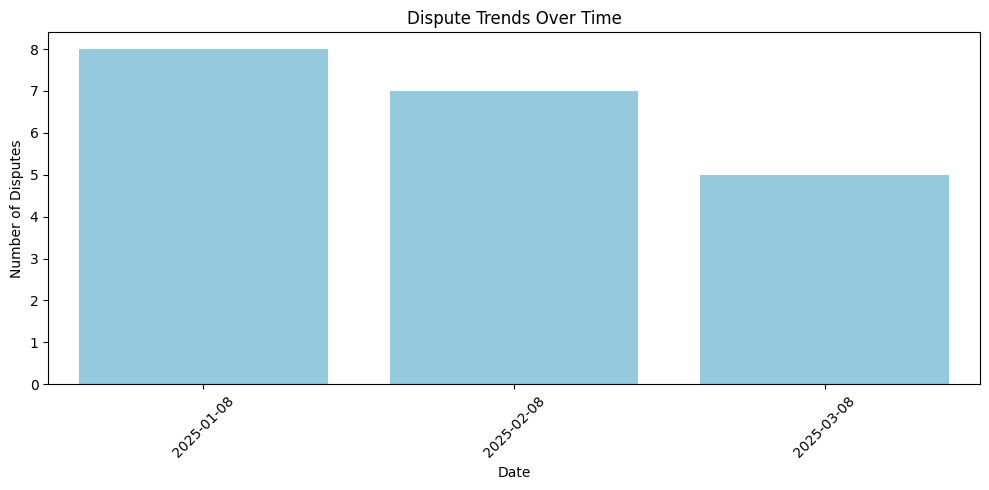

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

dispute_details = pd.read_csv("/content/disputes.csv")

dispute_details['date'] = pd.to_datetime(dispute_details['created_at'])

dispute_trend = dispute_details.groupby(dispute_details['date'].dt.date).size()

plt.figure(figsize=(10, 5))
sns.barplot(x=dispute_trend.index, y=dispute_trend.values, color='skyblue')
plt.title("Dispute Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Disputes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Adding case history tracking (status updates)

,dispute_id,status,updated_at
0,D001,Created,2025-08-01
1,D001,Under Review,2025-08-04
2,D001,Investigation,2025-08-07
3,D002,Created,2025-08-01
4,D002,Under Review,2025-08-04


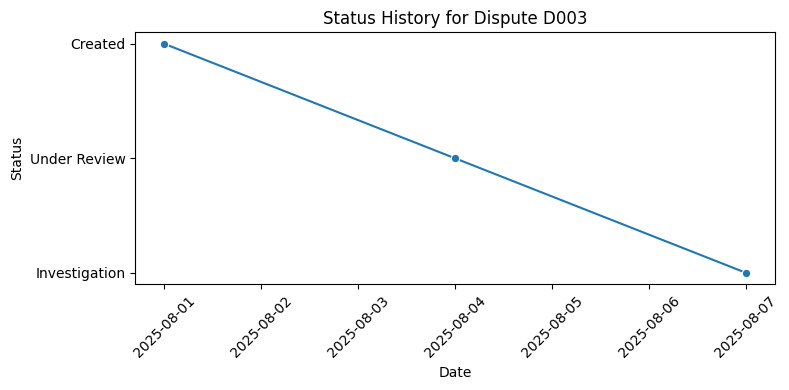

In [44]:
import numpy as np

# Example statuses in a realistic progression
status_stages = ['Created', 'Under Review', 'Investigation', 'Resolution Suggested', 'Resolved']

# Generate synthetic case history per dispute
case_history = []

for dispute_id in dispute_details['dispute_id']:
    num_updates = np.random.randint(3, 6)
    update_dates = pd.date_range(start='2025-08-01', periods=num_updates, freq='3D')
    updates = status_stages[:num_updates]

    for status, date in zip(updates, update_dates):
        case_history.append({
            'dispute_id': dispute_id,
            'status': status,
            'updated_at': date
        })

case_history_df = pd.DataFrame(case_history)

display(case_history_df.head())

dispute_id = np.random.randint(0, len(dispute_details))
sample_id = dispute_details['dispute_id'].iloc[dispute_id]
sample_history = case_history_df[case_history_df['dispute_id'] == sample_id]

plt.figure(figsize=(8, 4))
sns.lineplot(data=sample_history, x='updated_at', y='status', marker='o')
plt.title(f"Status History for Dispute {sample_id}")
plt.xlabel("Date")
plt.ylabel("Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
